# CH02-01: 什麼是自然語言處理 (NLP)

**課程目標:**
- 理解自然語言處理的定義與本質
- 掌握 NLP 的六大核心應用場景
- 了解語言的三大挑戰 (歧義性、離散性、上下文依賴)
- 實作簡單的 NLP Pipeline

**學習時間:** 約 60-90 分鐘

**前置知識:**
- Python 基礎語法
- 基本機器學習概念
- 線性代數基礎

---

## 📚 目錄

1. [NLP 的定義與範疇](#1)
2. [為什麼 NLP 困難? 語言的三大挑戰](#2)
3. [NLP 六大應用場景](#3)
4. [NLP vs NLU vs NLG 的區別](#4)
5. [詞向量化簡介: 從離散到連續](#5)
6. [實戰練習: 構建簡單 NLP Pipeline](#6)
7. [視覺化: NLP 技術棧層級圖](#7)
8. [本課總結與延伸閱讀](#8)

---

✅ 成功載入專案字體: jf-openhuninn-1.0
✅ 環境設定完成
NumPy 版本: 1.23.5
Pandas 版本: 2.2.3


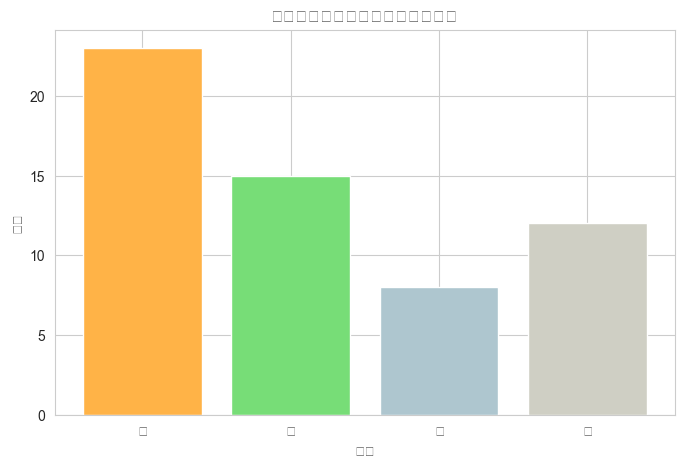

In [ ]:
# 環境設定與套件導入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
from matplotlib.font_manager import fontManager
import os

warnings.filterwarnings('ignore')

# --- 中文顯示設定 ---
# 優先使用專案內附的字體,確保跨平台一致性
# 從目前 notebook 位置 (`課程資料/02_自然語言處理入門/範例程式`) 回到根目錄需要三層 `../`
font_path = os.path.join('..', '..', '..', 'shared_resources', 'fonts', 'jf-openhuninn-1.0.ttf')

if os.path.exists(font_path):
    # 動態添加字體
    fontManager.addfont(font_path)
    # 設定 Matplotlib 的字體系列
    # 字體名稱 'jf-openhuninn-1.0' 需與字體檔內部定義的名稱相符
    plt.rcParams['font.family'] = 'jf-openhuninn-1.0'
    print(f"✅ 成功載入專案字體: jf-openhuninn-1.0")
else:
    # 如果專案字體不存在,則使用備用系統字體
    print(f"⚠️ 警告: 在 '{os.path.abspath(font_path)}' 找不到專案字體。")
    print("嘗試使用系統預設字體 (可能導致中文亂碼)。")
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS', 'sans-serif']

# 解決 Matplotlib 中文軸負號顯示問題
plt.rcParams['axes.unicode_minus'] = False
# --- 中文顯示設定結束 ---

# 設定顯示風格
sns.set_style('whitegrid')
sns.set_palette('husl')

print("✅ 環境設定完成")
print(f"NumPy 版本: {np.__version__}")
print(f"Pandas 版本: {pd.__version__}")


# -- 中文 Matplotlib 測試圖表 --
test_labels = ['貓', '狗', '鳥', '魚']
test_counts = [23, 15, 8, 12]

plt.figure(figsize=(8, 5))
plt.bar(test_labels, test_counts, color=['#FFB347', '#77DD77', '#AEC6CF', '#CFCFC4'])
plt.title('寵物類型統計圖（中文顯示測試）')
plt.xlabel('動物')
plt.ylabel('數量')
plt.show()


<a id="1"></a>
## 1. NLP 的定義與範疇

### 1.1 什麼是自然語言處理?

**定義:**
> 自然語言處理 (Natural Language Processing, NLP) 是人工智能與語言學的交叉領域,研究如何讓電腦理解、解釋與生成人類語言。

**核心目標:**
1. **理解 (Understanding)**: 從文本中提取語義 (分類、實體識別、情感分析)
2. **生成 (Generation)**: 創造符合語法與語義的文本 (翻譯、摘要、對話)
3. **轉換 (Transformation)**: 改變文本形式但保留語義 (翻譯、改寫)

---

### 1.2 NLP 在 AI 技術棧的位置

```
人工智能 (Artificial Intelligence)
├─ 感知智能 (Perception)
│  ├─ 計算機視覺 (Computer Vision)
│  ├─ 自然語言處理 (NLP) ← 我們在這裡
│  └─ 語音識別 (Speech Recognition)
└─ 認知智能 (Cognition)
   ├─ 知識圖譜 (Knowledge Graph)
   └─ 推理系統 (Reasoning)
```

---

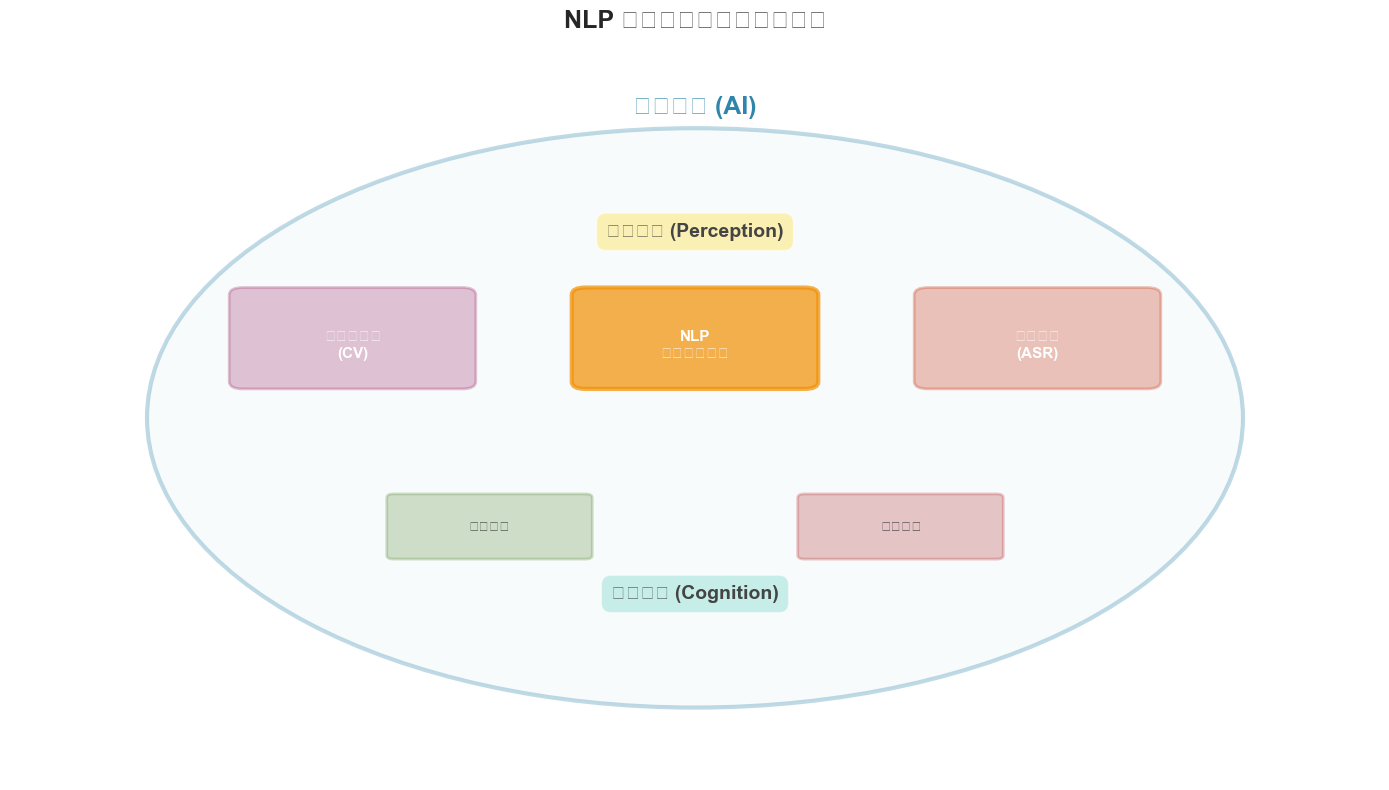


💡 核心觀察:
  - NLP 屬於感知智能層,負責理解與生成人類語言
  - 與 CV(視覺)、ASR(語音) 並列為三大感知技術
  - 為上層的認知智能(知識圖譜、推理)提供基礎


In [15]:
# 視覺化: NLP 在 AI 領域的位置
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# AI 大圓
ai_circle = mpatches.Circle((5, 5), 4, linewidth=3, edgecolor='#2E86AB', facecolor='#E8F4F8', alpha=0.3)
ax.add_patch(ai_circle)
ax.text(5, 9.2, '人工智能 (AI)', ha='center', fontsize=18, fontweight='bold', color='#2E86AB')

# 感知智能區塊
perception_areas = [
    (2.5, 6, '計算機視覺\n(CV)', '#A23B72'),
    (5, 6, 'NLP\n自然語言處理', '#F18F01'),
    (7.5, 6, '語音識別\n(ASR)', '#C73E1D')
]

for x, y, label, color in perception_areas:
    if 'NLP' in label:
        rect = mpatches.FancyBboxPatch((x-0.8, y-0.5), 1.6, 1.2,
                                        boxstyle="round,pad=0.1",
                                        linewidth=3, edgecolor=color,
                                        facecolor=color, alpha=0.7)
    else:
        rect = mpatches.FancyBboxPatch((x-0.8, y-0.5), 1.6, 1.2,
                                        boxstyle="round,pad=0.1",
                                        linewidth=2, edgecolor=color,
                                        facecolor=color, alpha=0.3)
    ax.add_patch(rect)
    ax.text(x, y, label, ha='center', va='center', fontsize=11, fontweight='bold', color='white')

# 感知智能標籤
ax.text(5, 7.5, '感知智能 (Perception)', ha='center', fontsize=14, 
        fontweight='bold', color='#444',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFE66D', alpha=0.5))

# 認知智能區塊
cognition_areas = [
    (3.5, 3.5, '知識圖譜', '#6A994E'),
    (6.5, 3.5, '推理系統', '#BC4749')
]

for x, y, label, color in cognition_areas:
    rect = mpatches.FancyBboxPatch((x-0.7, y-0.4), 1.4, 0.8,
                                    boxstyle="round,pad=0.05",
                                    linewidth=2, edgecolor=color,
                                    facecolor=color, alpha=0.3)
    ax.add_patch(rect)
    ax.text(x, y, label, ha='center', va='center', fontsize=10, fontweight='bold')

# 認知智能標籤
ax.text(5, 2.5, '認知智能 (Cognition)', ha='center', fontsize=14,
        fontweight='bold', color='#444',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#95E1D3', alpha=0.5))

plt.title('NLP 在人工智能技術棧的位置', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 核心觀察:")
print("  - NLP 屬於感知智能層,負責理解與生成人類語言")
print("  - 與 CV(視覺)、ASR(語音) 並列為三大感知技術")
print("  - 為上層的認知智能(知識圖譜、推理)提供基礎")

<a id="2"></a>
## 2. 為什麼 NLP 困難? 語言的三大挑戰

自然語言是人類思維的符號化表示,充滿歧義、隱喻與上下文依賴。

### 2.1 挑戰一: 語言的歧義性 (Ambiguity)

自然語言在多個層次上存在歧義:

#### 1. 詞彙歧義 (Lexical Ambiguity)
- **一詞多義**: 同一個詞在不同語境有不同意思
- 範例: "bank" (銀行 vs 河岸)、"蘋果" (水果 vs 公司)

#### 2. 句法歧義 (Syntactic Ambiguity)
- **結構歧義**: 同一句子可有多種句法結構
- 範例: "I saw the man with the telescope"
  - 解讀 1: 我用望遠鏡看到那個人
  - 解讀 2: 我看到拿著望遠鏡的那個人

#### 3. 語義歧義 (Semantic Ambiguity)
- **深層歧義**: 需要常識推理
- 範例: "The chicken is ready to eat"
  - 解讀 1: 雞肉煮好可以吃了
  - 解讀 2: 這隻雞準備要吃東西了

---

🔍 詞彙歧義範例:

詞彙: 'bank'
  1. 銀行 (financial institution)
  2. 河岸 (river bank)

詞彙: '蘋果'
  1. 水果 (fruit)
  2. 公司 (Apple Inc.)

詞彙: 'watch'
  1. 手錶 (timepiece)
  2. 觀看 (to observe)

詞彙: '打'
  1. 擊打 (to hit)
  2. 製作 (to make)
  3. 撥打 (to dial)


📐 句法歧義範例:

句子: I saw the man with the telescope

可能的句法結構:
  1. [I] [saw] [the man] [with the telescope]
     → 我用望遠鏡看到那個人 (with 修飾 saw)
  2. [I] [saw] [the man with the telescope]
     → 我看到拿著望遠鏡的那個人 (with 修飾 man)


⚠️ 歧義的組合爆炸問題:
假設一個句子有 n 個詞,每個詞有 k 個可能的語義:
總可能解釋數 = k^n



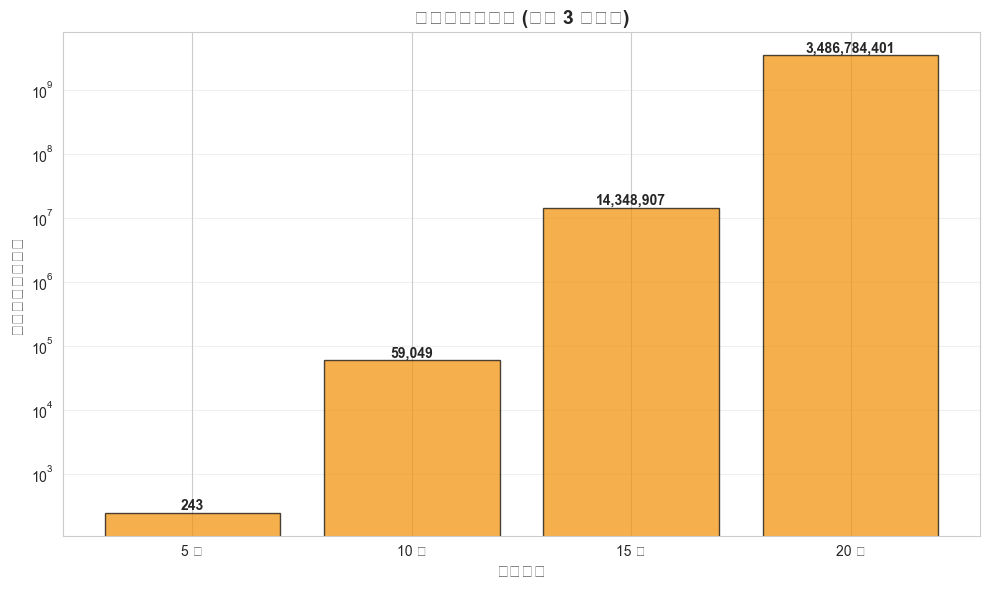


結論: 隨著句子長度增加,搜尋空間呈指數級增長 (NP-Hard 問題)


In [16]:
# 歧義性展示: 詞彙歧義範例
ambiguous_words = {
    'bank': ['銀行 (financial institution)', '河岸 (river bank)'],
    '蘋果': ['水果 (fruit)', '公司 (Apple Inc.)'],
    'watch': ['手錶 (timepiece)', '觀看 (to observe)'],
    '打': ['擊打 (to hit)', '製作 (to make)', '撥打 (to dial)']
}

print("🔍 詞彙歧義範例:\n")
for word, meanings in ambiguous_words.items():
    print(f"詞彙: '{word}'")
    for i, meaning in enumerate(meanings, 1):
        print(f"  {i}. {meaning}")
    print()

# 句法歧義範例
print("\n📐 句法歧義範例:\n")
sentence = "I saw the man with the telescope"
print(f"句子: {sentence}\n")
print("可能的句法結構:")
print("  1. [I] [saw] [the man] [with the telescope]")
print("     → 我用望遠鏡看到那個人 (with 修飾 saw)")
print("  2. [I] [saw] [the man with the telescope]")
print("     → 我看到拿著望遠鏡的那個人 (with 修飾 man)")

# 歧義的組合爆炸
print("\n\n⚠️ 歧義的組合爆炸問題:")
print("假設一個句子有 n 個詞,每個詞有 k 個可能的語義:")
print(f"總可能解釋數 = k^n\n")

# 計算範例
n_words = [5, 10, 15, 20]
k_meanings = 3

combinations = [k_meanings**n for n in n_words]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(len(n_words)), combinations, color='#F18F01', alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(n_words)))
ax.set_xticklabels([f'{n} 詞' for n in n_words])
ax.set_ylabel('可能的語義解釋數', fontsize=12)
ax.set_xlabel('句子長度', fontsize=12)
ax.set_yscale('log')
ax.set_title('歧義的組合爆炸 (每詞 3 種意思)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# 在柱狀圖上標註數值
for i, (bar, val) in enumerate(zip(bars, combinations)):
    ax.text(bar.get_x() + bar.get_width()/2, val, f'{val:,}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n結論: 隨著句子長度增加,搜尋空間呈指數級增長 (NP-Hard 問題)")

### 2.2 挑戰二: 語言的離散性 (Discreteness)

**問題**: 詞彙是離散符號,如何計算語義相似度?

#### 傳統方法 (One-Hot Encoding) 的侷限:

```python
詞彙表: {"dog", "cat", "apple", "orange"}

One-Hot 表示:
dog    = [1, 0, 0, 0]
cat    = [0, 1, 0, 0]
apple  = [0, 0, 1, 0]
orange = [0, 0, 0, 1]

問題:
1. 維度災難: 詞彙表 100,000 個詞 → 100,000 維向量
2. 無法表達相似度:
   dog · cat = 0 (餘弦相似度為 0)
   dog · apple = 0
   → 無法區分「狗和貓」比「狗和蘋果」更相似
```

#### 解決方案: 詞向量 (Word Embeddings)

將詞彙映射到連續向量空間,捕捉語義相似度。

---

=== One-Hot 編碼 ===
dog     : [1. 0. 0. 0.]
cat     : [0. 1. 0. 0.]
apple   : [0. 0. 1. 0.]
orange  : [0. 0. 0. 1.]

One-Hot 餘弦相似度:
dog ↔ cat:   0.00
dog ↔ apple: 0.00
→ 所有詞彙相似度都是 0,無法表達語義關係!


=== 詞向量 (Word Embeddings) ===
dog     : [0.2 0.8 0.1]
cat     : [0.3  0.7  0.15]
apple   : [0.9  0.1  0.05]
orange  : [0.85 0.15 0.1 ]

詞向量餘弦相似度:
dog ↔ cat:   0.98 (高相似度)
dog ↔ apple: 0.35 (低相似度)
→ 詞向量能捕捉語義相似度!


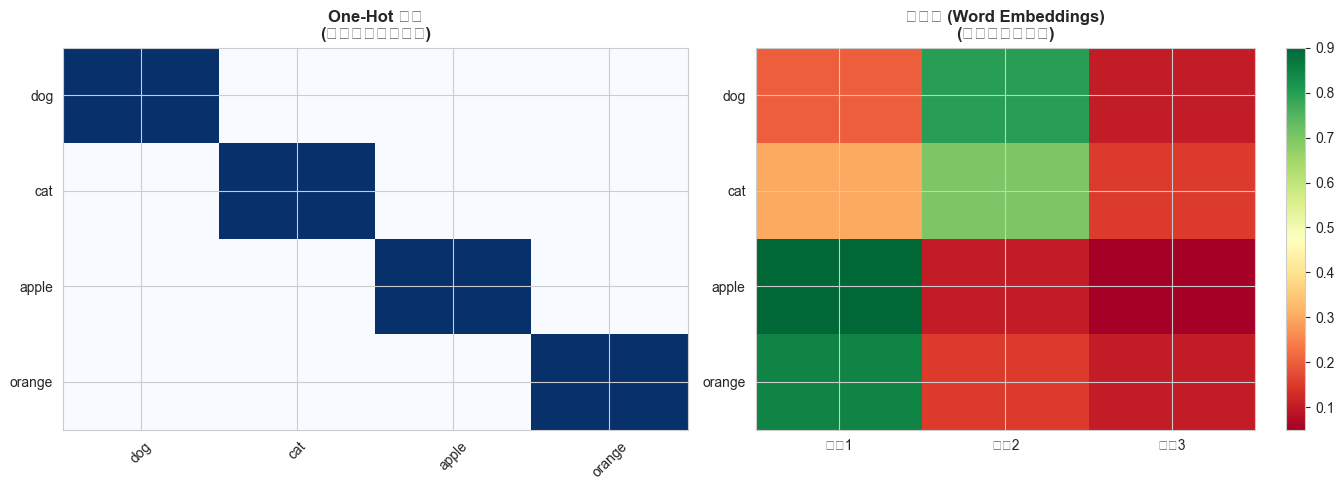


🎯 核心觀察:
  - One-Hot: 稀疏、高維、無法表達相似度
  - 詞向量: 稠密、低維、捕捉語義關係
  - 這就是為什麼現代 NLP 都使用詞向量!


In [17]:
# One-Hot vs 詞向量對比
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# One-Hot 編碼
vocab = ['dog', 'cat', 'apple', 'orange']
one_hot = np.eye(len(vocab))

print("=== One-Hot 編碼 ===")
for word, vector in zip(vocab, one_hot):
    print(f"{word:8s}: {vector}")

# 計算 One-Hot 相似度
print("\nOne-Hot 餘弦相似度:")
print(f"dog ↔ cat:   {cosine_similarity([one_hot[0]], [one_hot[1]])[0][0]:.2f}")
print(f"dog ↔ apple: {cosine_similarity([one_hot[0]], [one_hot[2]])[0][0]:.2f}")
print("→ 所有詞彙相似度都是 0,無法表達語義關係!\n")

# 模擬詞向量 (簡化版)
print("\n=== 詞向量 (Word Embeddings) ===")
embeddings = {
    'dog':    [0.2, 0.8, 0.1],  # 動物特徵強
    'cat':    [0.3, 0.7, 0.15], # 動物特徵強
    'apple':  [0.9, 0.1, 0.05], # 植物特徵強
    'orange': [0.85, 0.15, 0.1] # 植物特徵強
}

for word, vector in embeddings.items():
    print(f"{word:8s}: {np.array(vector)}")

# 計算詞向量相似度
print("\n詞向量餘弦相似度:")
dog_vec = np.array(embeddings['dog']).reshape(1, -1)
cat_vec = np.array(embeddings['cat']).reshape(1, -1)
apple_vec = np.array(embeddings['apple']).reshape(1, -1)

sim_dog_cat = cosine_similarity(dog_vec, cat_vec)[0][0]
sim_dog_apple = cosine_similarity(dog_vec, apple_vec)[0][0]

print(f"dog ↔ cat:   {sim_dog_cat:.2f} (高相似度)")
print(f"dog ↔ apple: {sim_dog_apple:.2f} (低相似度)")
print("→ 詞向量能捕捉語義相似度!")

# 視覺化對比
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# One-Hot 視覺化
axes[0].imshow(one_hot, cmap='Blues', aspect='auto')
axes[0].set_xticks(range(len(vocab)))
axes[0].set_yticks(range(len(vocab)))
axes[0].set_xticklabels(vocab, rotation=45)
axes[0].set_yticklabels(vocab)
axes[0].set_title('One-Hot 編碼\n(稀疏、無語義關係)', fontsize=12, fontweight='bold')

# 詞向量視覺化
embedding_matrix = np.array(list(embeddings.values()))
im = axes[1].imshow(embedding_matrix, cmap='RdYlGn', aspect='auto')
axes[1].set_xticks(range(3))
axes[1].set_yticks(range(len(vocab)))
axes[1].set_xticklabels(['維度1', '維度2', '維度3'])
axes[1].set_yticklabels(vocab)
axes[1].set_title('詞向量 (Word Embeddings)\n(稠密、捕捉語義)', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=axes[1])

plt.tight_layout()
plt.show()

print("\n🎯 核心觀察:")
print("  - One-Hot: 稀疏、高維、無法表達相似度")
print("  - 詞向量: 稠密、低維、捕捉語義關係")
print("  - 這就是為什麼現代 NLP 都使用詞向量!")

### 2.3 挑戰三: 語言的上下文依賴 (Context Dependency)

**問題**: 同一個詞在不同語境中意義不同

#### 範例: "bank" 的多義性
- 句子 1: "The river **bank** was flooded." (河岸)
- 句子 2: "I went to the **bank** for a loan." (銀行)

#### 靜態詞向量 (Word2Vec) 的侷限:
- `bank` 只有一個固定向量,無法區分不同語義

#### 動態詞向量 (BERT) 的解決方案:
- `bank_riverbank = BERT("The river bank was flooded.")[2]`
- `bank_financial = BERT("I went to the bank for a loan.")[6]`
- `bank_riverbank ≠ bank_financial` (向量不同)

---

🔍 上下文依賴範例

句子: The river **bank** was flooded.
語義: 'bank' → 河岸

句子: I went to the **bank** for a loan.
語義: 'bank' → 銀行

句子: 我喜歡吃**蘋果**
語義: '蘋果' → 水果

句子: **蘋果**公司推出新產品
語義: '蘋果' → 公司


💡 解決方案對比:

靜態詞向量 (Word2Vec, 2013):
  - embed("bank") = v_bank (固定向量)
  - 缺點: 無法區分不同語境

動態詞向量 (BERT, 2018):
  - embed("bank", context) = f(context, "bank")
  - 優點: 根據上下文動態調整



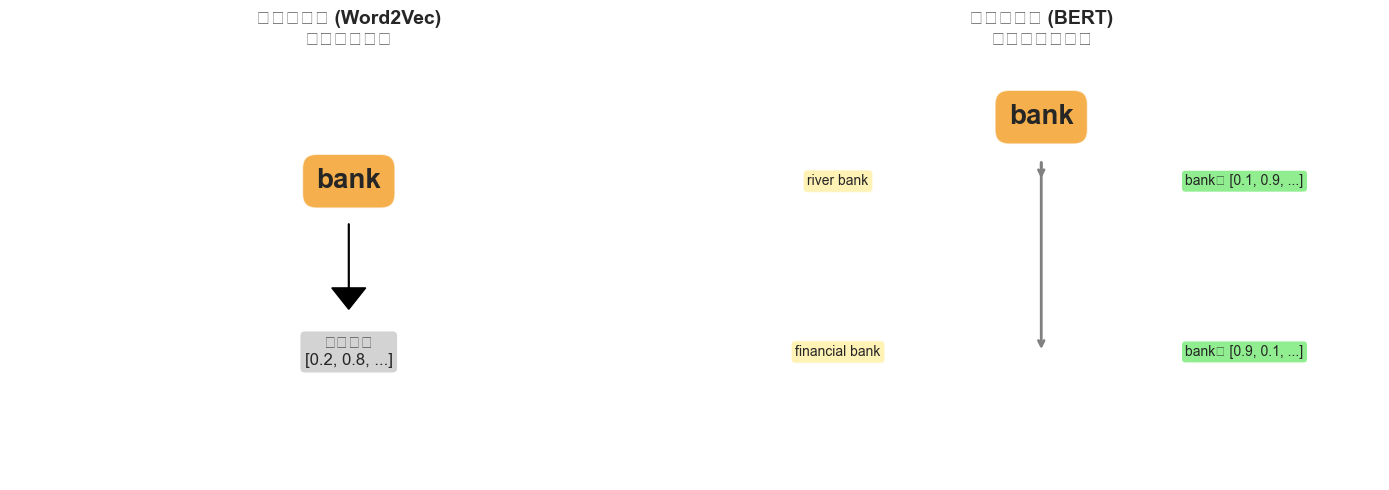


結論: BERT 等上下文感知模型是 NLP 的重大突破!


In [18]:
# 上下文依賴示範 (概念展示)
print("🔍 上下文依賴範例\n")

contexts = [
    ("bank", "The river bank was flooded.", "河岸"),
    ("bank", "I went to the bank for a loan.", "銀行"),
    ("蘋果", "我喜歡吃蘋果", "水果"),
    ("蘋果", "蘋果公司推出新產品", "公司"),
]

for word, sentence, meaning in contexts:
    # 高亮目標詞
    highlighted = sentence.replace(word, f"**{word}**")
    print(f"句子: {highlighted}")
    print(f"語義: '{word}' → {meaning}\n")

print("\n💡 解決方案對比:")
print("""
靜態詞向量 (Word2Vec, 2013):
  - embed("bank") = v_bank (固定向量)
  - 缺點: 無法區分不同語境

動態詞向量 (BERT, 2018):
  - embed("bank", context) = f(context, "bank")
  - 優點: 根據上下文動態調整
""")

# 視覺化: 靜態 vs 動態詞向量
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 靜態詞向量
axes[0].text(0.5, 0.7, 'bank', ha='center', va='center', fontsize=20, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='#F18F01', alpha=0.7))
axes[0].arrow(0.5, 0.6, 0, -0.15, head_width=0.05, head_length=0.05, fc='black', ec='black')
axes[0].text(0.5, 0.3, '固定向量\n[0.2, 0.8, ...]', ha='center', va='center', fontsize=12,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray'))
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].axis('off')
axes[0].set_title('靜態詞向量 (Word2Vec)\n無法區分語境', fontsize=14, fontweight='bold')

# 動態詞向量
contexts_bert = [
    ('river bank', 'bank₁ [0.1, 0.9, ...]', 0.7),
    ('financial bank', 'bank₂ [0.9, 0.1, ...]', 0.3)
]

axes[1].text(0.5, 0.85, 'bank', ha='center', va='center', fontsize=20, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='#F18F01', alpha=0.7))

for i, (context, vector, y_pos) in enumerate(contexts_bert):
    # 上下文
    axes[1].text(0.2, y_pos, context, ha='center', va='center', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='#FFE66D', alpha=0.5))
    # 箭頭
    axes[1].annotate('', xy=(0.5, y_pos), xytext=(0.5, 0.75),
                     arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
    # 向量
    axes[1].text(0.8, y_pos, vector, ha='center', va='center', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen'))

axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].axis('off')
axes[1].set_title('動態詞向量 (BERT)\n根據上下文調整', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n結論: BERT 等上下文感知模型是 NLP 的重大突破!")

<a id="3"></a>
## 3. NLP 六大應用場景

### 3.1 應用場景概覽

| 應用場景 | 核心思想 | 代表應用 | 關鍵技術 |
|:---|:---|:---|:---|
| **1. 資訊檢索** | 從海量文本中快速找到相關資訊 | Google 搜尋、文獻查詢 | TF-IDF, BM25, BERT |
| **2. 機器翻譯** | 將一種語言翻譯成另一種語言 | Google Translate, DeepL | Seq2Seq, Transformer |
| **3. 對話系統** | 與人類進行自然語言互動 | Siri, Alexa, ChatGPT | 意圖識別, 槽位填充, GPT |
| **4. 文本分類** | 將文本自動分配到預定義類別 | 垃圾郵件過濾, 情感分析 | Naive Bayes, SVM, BERT |
| **5. 資訊抽取** | 從非結構化文本中提取結構化資訊 | NER, 關係抽取 | CRF, BiLSTM-CRF |
| **6. 文本生成** | 自動創造流暢且有意義的文本 | 自動摘要, 程式碼生成 | RNN, GPT, T5 |

---

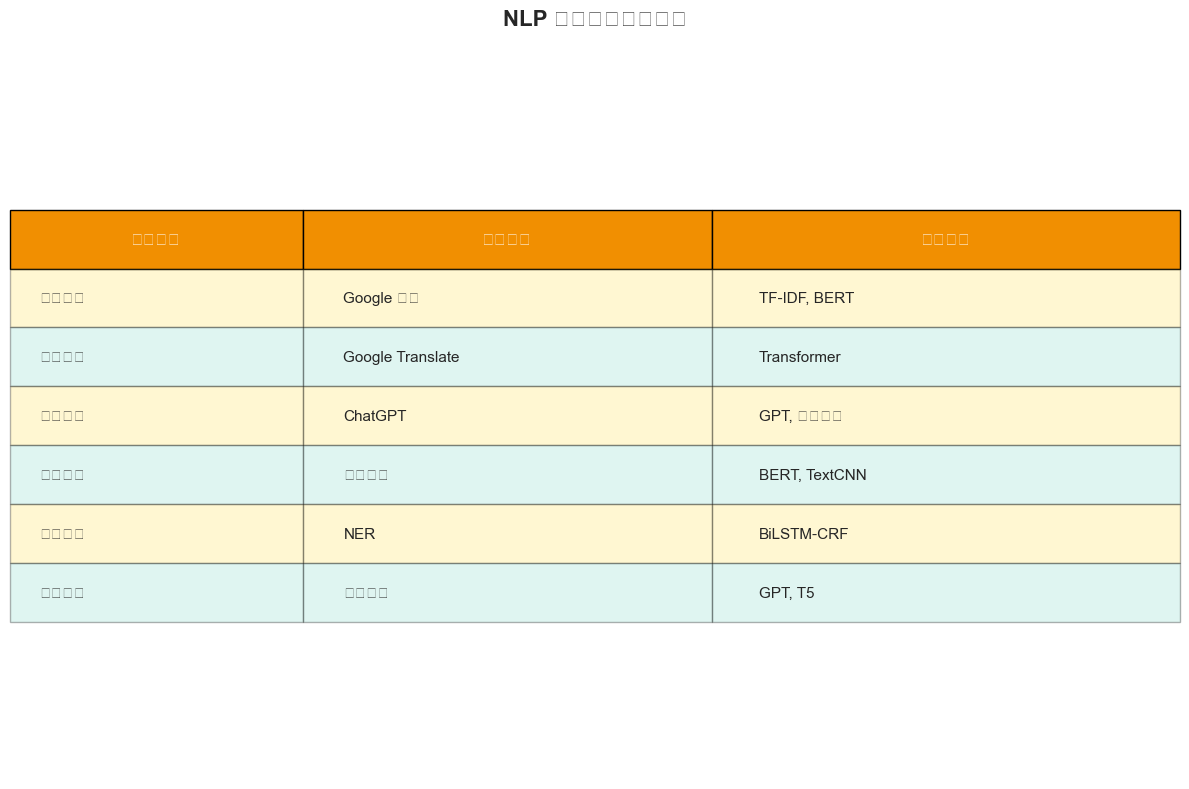


💡 應用場景分析:
  1. 資訊檢索: 最早期的應用,搜尋引擎核心技術
  2. 機器翻譯: Transformer 的原始應用場景
  3. 對話系統: ChatGPT 引爆 AI 熱潮的領域
  4. 文本分類: 最常見的 NLP 任務,應用廣泛
  5. 資訊抽取: 結構化非結構化數據的關鍵
  6. 文本生成: LLM 時代的核心能力


In [19]:
# 六大應用場景視覺化
applications = [
    ('資訊檢索', 'Google 搜尋', 'TF-IDF, BERT'),
    ('機器翻譯', 'Google Translate', 'Transformer'),
    ('對話系統', 'ChatGPT', 'GPT, 意圖識別'),
    ('文本分類', '情感分析', 'BERT, TextCNN'),
    ('資訊抽取', 'NER', 'BiLSTM-CRF'),
    ('文本生成', '自動摘要', 'GPT, T5')
]

df_apps = pd.DataFrame(applications, columns=['應用場景', '代表應用', '關鍵技術'])

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# 創建表格
table = ax.table(cellText=df_apps.values, colLabels=df_apps.columns,
                cellLoc='left', loc='center',
                colWidths=[0.25, 0.35, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 3)

# 設定表頭樣式
for i in range(len(df_apps.columns)):
    table[(0, i)].set_facecolor('#F18F01')
    table[(0, i)].set_text_props(weight='bold', color='white', fontsize=12)

# 設定交替行顏色
colors = ['#FFE66D', '#95E1D3', '#FFE66D', '#95E1D3', '#FFE66D', '#95E1D3']
for i in range(1, len(df_apps) + 1):
    for j in range(len(df_apps.columns)):
        table[(i, j)].set_facecolor(colors[i-1])
        table[(i, j)].set_alpha(0.3)

plt.title('NLP 六大核心應用場景', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 應用場景分析:")
print("  1. 資訊檢索: 最早期的應用,搜尋引擎核心技術")
print("  2. 機器翻譯: Transformer 的原始應用場景")
print("  3. 對話系統: ChatGPT 引爆 AI 熱潮的領域")
print("  4. 文本分類: 最常見的 NLP 任務,應用廣泛")
print("  5. 資訊抽取: 結構化非結構化數據的關鍵")
print("  6. 文本生成: LLM 時代的核心能力")

### 3.2 應用場景代碼展示

以下展示 6 大應用場景的簡單實作 (使用模擬數據與簡化方法):

---

In [20]:
# 應用 1: 中文分詞 (資訊檢索的基礎)
print("=" * 60)
print("應用 1: 中文分詞 (Word Segmentation)")
print("=" * 60)

try:
    import jieba
    text = "自然語言處理是人工智能的重要分支"
    words = jieba.cut(text)
    print(f"\n原文: {text}")
    print(f"分詞結果: {' / '.join(words)}")
    print("\n✅ jieba 分詞成功")
except ImportError:
    print("\n⚠️ 需要安裝 jieba: pip install jieba")
    print("簡單分詞範例 (基於空格):")
    text = "Natural language processing is amazing"
    words = text.split()
    print(f"原文: {text}")
    print(f"分詞: {' / '.join(words)}")

應用 1: 中文分詞 (Word Segmentation)

原文: 自然語言處理是人工智能的重要分支
分詞結果: 自然 / 語言 / 處理 / 是 / 人工智能 / 的 / 重要 / 分支

✅ jieba 分詞成功


In [21]:
# 應用 2: 簡單情感分析 (文本分類)
print("\n" + "=" * 60)
print("應用 2: 情感分析 (Sentiment Analysis)")
print("=" * 60)

# 簡單的基於詞典的情感分析
positive_words = {'好', '棒', '優秀', '喜歡', '推薦', '精彩', 'good', 'great', 'excellent', 'love'}
negative_words = {'差', '糟', '爛', '討厭', '失望', 'bad', 'terrible', 'awful', 'hate'}

def simple_sentiment(text):
    """簡單情感分析"""
    words = set(text.lower().split())
    pos_count = len(words & positive_words)
    neg_count = len(words & negative_words)
    
    if pos_count > neg_count:
        return "正面 (Positive)", pos_count
    elif neg_count > pos_count:
        return "負面 (Negative)", neg_count
    else:
        return "中性 (Neutral)", 0

# 測試
test_texts = [
    "這部電影太精彩了,強烈推薦!",
    "This movie is great and excellent!",
    "服務態度很差,再也不會來了。"
]

for text in test_texts:
    sentiment, count = simple_sentiment(text)
    print(f"\n文本: {text}")
    print(f"情感: {sentiment} (關鍵詞數: {count})")

print("\n💡 注意: 這是簡化版,實際應用使用 BERT 等深度學習模型")


應用 2: 情感分析 (Sentiment Analysis)

文本: 這部電影太精彩了,強烈推薦!
情感: 中性 (Neutral) (關鍵詞數: 0)

文本: This movie is great and excellent!
情感: 正面 (Positive) (關鍵詞數: 1)

文本: 服務態度很差,再也不會來了。
情感: 中性 (Neutral) (關鍵詞數: 0)

💡 注意: 這是簡化版,實際應用使用 BERT 等深度學習模型


In [22]:
# 應用 3: 簡單命名實體識別 (資訊抽取)
print("\n" + "=" * 60)
print("應用 3: 命名實體識別 (Named Entity Recognition)")
print("=" * 60)

# 簡單的基於規則的 NER
import re

def simple_ner(text):
    """簡單 NER (正則表達式)"""
    entities = []
    
    # 識別日期
    dates = re.findall(r'\d{4}年\d{1,2}月\d{1,2}日', text)
    entities.extend([(date, 'DATE') for date in dates])
    
    # 識別數字
    numbers = re.findall(r'\d+', text)
    entities.extend([(num, 'NUMBER') for num in numbers if len(num) > 2])
    
    # 識別大寫開頭的英文詞 (可能是人名/地名)
    proper_nouns = re.findall(r'\b[A-Z][a-z]+\b', text)
    entities.extend([(noun, 'PROPER_NOUN') for noun in proper_nouns])
    
    return entities

# 測試
test_text = "Apple Inc. was founded by Steve Jobs in 1976. The company is based in California."
entities = simple_ner(test_text)

print(f"\n文本: {test_text}\n")
print("識別實體:")
for entity, entity_type in entities:
    print(f"  {entity:20s} → {entity_type}")

print("\n💡 注意: 實際 NER 使用 BERT-NER、spaCy 等工具")


應用 3: 命名實體識別 (Named Entity Recognition)

文本: Apple Inc. was founded by Steve Jobs in 1976. The company is based in California.

識別實體:
  1976                 → NUMBER
  Apple                → PROPER_NOUN
  Inc                  → PROPER_NOUN
  Steve                → PROPER_NOUN
  Jobs                 → PROPER_NOUN
  The                  → PROPER_NOUN
  California           → PROPER_NOUN

💡 注意: 實際 NER 使用 BERT-NER、spaCy 等工具


<a id="4"></a>
## 4. NLP vs NLU vs NLG 的區別

### 4.1 三者關係

```
NLP (Natural Language Processing)
├─ NLU (Natural Language Understanding) - 理解
│  ├─ 文本分類
│  ├─ 命名實體識別
│  ├─ 情感分析
│  └─ 意圖識別
│
└─ NLG (Natural Language Generation) - 生成
   ├─ 文本摘要
   ├─ 機器翻譯
   ├─ 對話回覆
   └─ 文章撰寫
```

---

### 4.2 詳細對比

| 維度 | NLP | NLU | NLG |
|:---|:---|:---|:---|
| **定義** | 讓電腦處理人類語言 | 理解語言的語義 | 生成流暢的語言 |
| **範疇** | NLU + NLG + 其他 | NLP 的子領域 | NLP 的子領域 |
| **方向** | 雙向 | 輸入 → 理解 | 理解 → 輸出 |
| **任務** | 所有語言任務 | 分類、抽取、理解 | 翻譯、摘要、對話 |
| **代表模型** | - | BERT, RoBERTa | GPT, T5 |
| **難度** | - | ★★★☆☆ | ★★★★☆ |

---

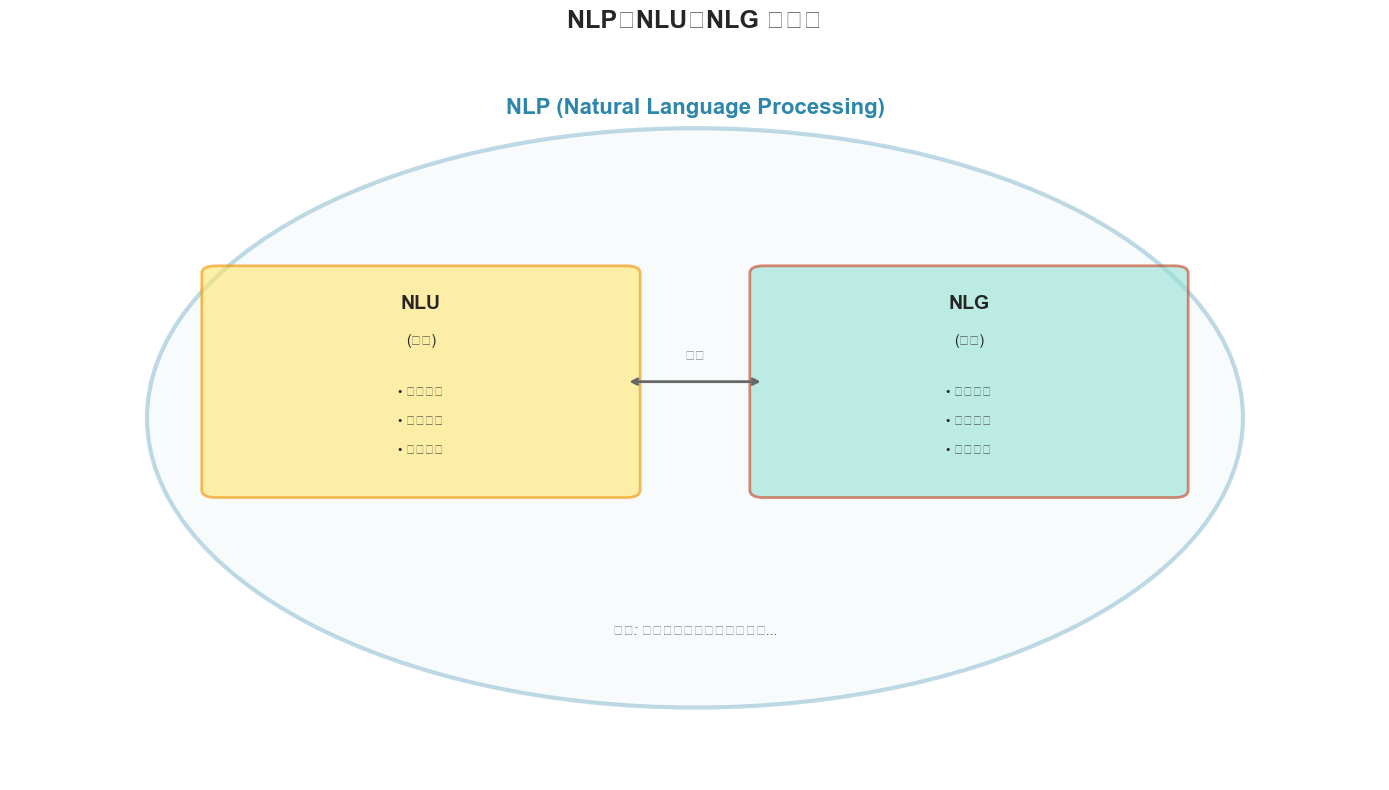


💡 核心觀察:
  - NLP 是總稱,包含 NLU 和 NLG
  - NLU 專注理解 (分析輸入)
  - NLG 專注生成 (產生輸出)
  - 完整對話系統 = NLU (理解問題) + NLG (生成回答)


In [23]:
# NLP, NLU, NLG 關係視覺化
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# NLP 大圓
nlp_circle = mpatches.Circle((5, 5), 4, linewidth=3, edgecolor='#2E86AB', 
                             facecolor='#E8F4F8', alpha=0.3)
ax.add_patch(nlp_circle)
ax.text(5, 9.2, 'NLP (Natural Language Processing)', 
        ha='center', fontsize=16, fontweight='bold', color='#2E86AB')

# NLU 區塊
nlu_rect = mpatches.FancyBboxPatch((1.5, 4), 3, 3,
                                    boxstyle="round,pad=0.1",
                                    linewidth=2, edgecolor='#F18F01',
                                    facecolor='#FFE66D', alpha=0.6)
ax.add_patch(nlu_rect)
ax.text(3, 6.5, 'NLU', ha='center', fontsize=14, fontweight='bold')
ax.text(3, 6, '(理解)', ha='center', fontsize=10)

nlu_tasks = ['文本分類', '實體識別', '情感分析']
for i, task in enumerate(nlu_tasks):
    ax.text(3, 5.3 - i*0.4, f'• {task}', ha='center', fontsize=9)

# NLG 區塊
nlg_rect = mpatches.FancyBboxPatch((5.5, 4), 3, 3,
                                    boxstyle="round,pad=0.1",
                                    linewidth=2, edgecolor='#C73E1D',
                                    facecolor='#95E1D3', alpha=0.6)
ax.add_patch(nlg_rect)
ax.text(7, 6.5, 'NLG', ha='center', fontsize=14, fontweight='bold')
ax.text(7, 6, '(生成)', ha='center', fontsize=10)

nlg_tasks = ['文本摘要', '機器翻譯', '對話生成']
for i, task in enumerate(nlg_tasks):
    ax.text(7, 5.3 - i*0.4, f'• {task}', ha='center', fontsize=9)

# 其他 NLP 任務
ax.text(5, 2, '其他: 分詞、詞性標註、句法分析...', 
        ha='center', fontsize=10, style='italic', color='#666')

# 箭頭表示關係
ax.annotate('', xy=(5.5, 5.5), xytext=(4.5, 5.5),
            arrowprops=dict(arrowstyle='<->', lw=2, color='#666'))
ax.text(5, 5.8, '互補', ha='center', fontsize=10, color='#666')

plt.title('NLP、NLU、NLG 關係圖', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 核心觀察:")
print("  - NLP 是總稱,包含 NLU 和 NLG")
print("  - NLU 專注理解 (分析輸入)")
print("  - NLG 專注生成 (產生輸出)")
print("  - 完整對話系統 = NLU (理解問題) + NLG (生成回答)")

<a id="5"></a>
## 5. 詞向量化簡介: 從離散到連續

### 5.1 為什麼需要詞向量?

**問題**: 機器學習模型需要數值輸入,如何表示詞彙?

#### 方案 1: One-Hot 編碼 (傳統方法)
- **優點**: 簡單、直觀
- **缺點**: 
  - 維度災難 (詞彙表 100K → 100K 維)
  - 無法表達相似度
  - 稀疏表示

#### 方案 2: 詞向量 (Word Embeddings)
- **優點**:
  - 低維稠密表示 (300 維)
  - 捕捉語義相似度
  - 可遷移學習
- **代表方法**: Word2Vec, GloVe, FastText

---

### 5.2 詞向量的數學原理

**核心思想**: 分佈式假設 (Distributional Hypothesis)

> "You shall know a word by the company it keeps." — J.R. Firth

**意思**: 相似上下文的詞有相似語義

---

詞向量概念展示


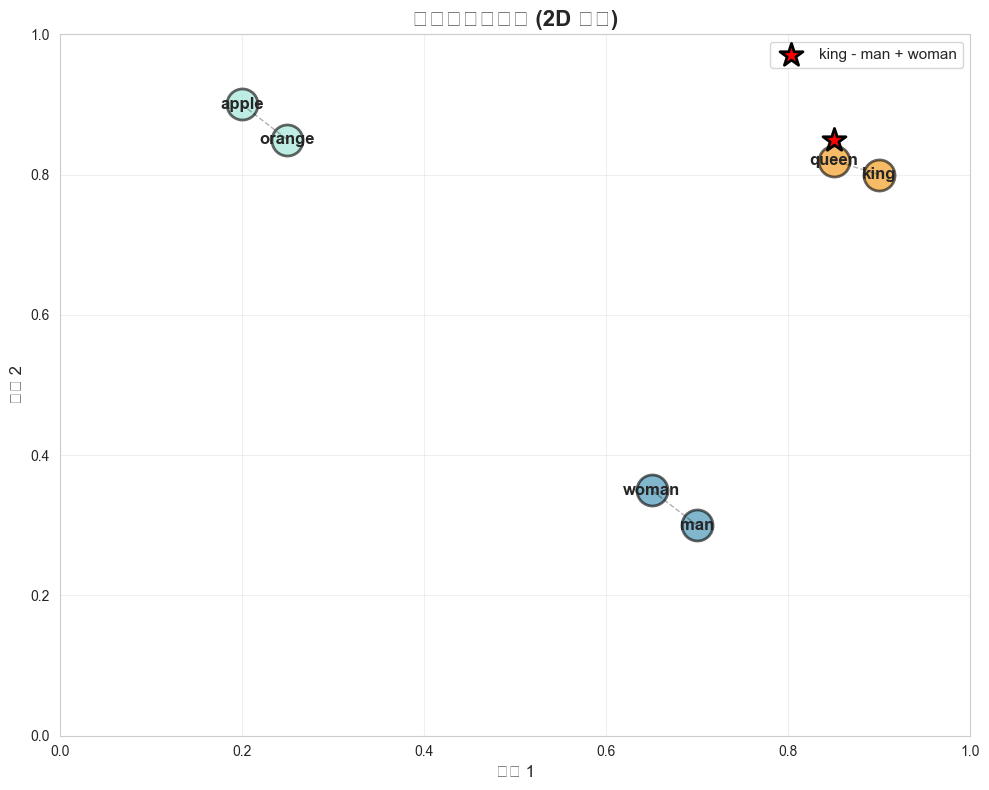


🔍 觀察:
  1. 相似詞在向量空間中靠近 (king ↔ queen, man ↔ woman)
  2. 語義關係可以用向量運算表達
  3. king - man + woman ≈ queen (性別類比)

📐 距離計算:
  king  ↔ queen:  0.054
  man   ↔ woman:  0.071
  king  ↔ apple:  0.707
  → 相似詞距離較小!


In [24]:
# 詞向量簡單展示
print("=" * 60)
print("詞向量概念展示")
print("=" * 60)

# 模擬詞向量 (2D 簡化版,實際是 300D)
word_vectors = {
    'king': np.array([0.9, 0.8]),
    'queen': np.array([0.85, 0.82]),
    'man': np.array([0.7, 0.3]),
    'woman': np.array([0.65, 0.35]),
    'apple': np.array([0.2, 0.9]),
    'orange': np.array([0.25, 0.85])
}

# 視覺化詞向量空間
fig, ax = plt.subplots(figsize=(10, 8))

# 繪製詞向量點
for word, vec in word_vectors.items():
    color = '#F18F01' if word in ['king', 'queen'] else '#2E86AB' if word in ['man', 'woman'] else '#95E1D3'
    ax.scatter(vec[0], vec[1], s=500, c=color, alpha=0.6, edgecolors='black', linewidth=2)
    ax.text(vec[0], vec[1], word, ha='center', va='center', fontsize=12, fontweight='bold')

# 繪製相似詞的連線
similar_pairs = [('king', 'queen'), ('man', 'woman'), ('apple', 'orange')]
for word1, word2 in similar_pairs:
    v1, v2 = word_vectors[word1], word_vectors[word2]
    ax.plot([v1[0], v2[0]], [v1[1], v2[1]], 'k--', alpha=0.3, linewidth=1)

# 展示詞向量運算: king - man + woman ≈ queen
king_vec = word_vectors['king']
man_vec = word_vectors['man']
woman_vec = word_vectors['woman']
result_vec = king_vec - man_vec + woman_vec

ax.scatter(result_vec[0], result_vec[1], s=300, c='red', marker='*', 
           edgecolors='black', linewidth=2, label='king - man + woman')

ax.set_xlabel('維度 1', fontsize=12)
ax.set_ylabel('維度 2', fontsize=12)
ax.set_title('詞向量空間展示 (2D 簡化)', fontsize=16, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("\n🔍 觀察:")
print("  1. 相似詞在向量空間中靠近 (king ↔ queen, man ↔ woman)")
print("  2. 語義關係可以用向量運算表達")
print("  3. king - man + woman ≈ queen (性別類比)")

# 計算實際距離
from scipy.spatial.distance import euclidean
print("\n📐 距離計算:")
print(f"  king  ↔ queen:  {euclidean(word_vectors['king'], word_vectors['queen']):.3f}")
print(f"  man   ↔ woman:  {euclidean(word_vectors['man'], word_vectors['woman']):.3f}")
print(f"  king  ↔ apple:  {euclidean(word_vectors['king'], word_vectors['apple']):.3f}")
print("  → 相似詞距離較小!")

<a id="6"></a>
## 6. 實戰練習: 構建簡單 NLP Pipeline

### 6.1 什麼是 NLP Pipeline?

NLP Pipeline 是將原始文本轉換為模型可用格式的一系列處理步驟:

```
原始文本
  ↓
1. 文本清洗 (去除噪音)
  ↓
2. 分詞 (Tokenization)
  ↓
3. 去除停用詞 (Stop Words Removal)
  ↓
4. 詞幹提取/詞形還原
  ↓
5. 特徵提取 (向量化)
  ↓
6. 模型訓練/預測
```

---

NLP Pipeline 實戰

原始文本:
  
Natural language processing (NLP) is a subfield of linguistics, 
computer science, and artificial intelligence. NLP is concerned 
with the interactions between computers and human language.


1. 清洗後:
  natural language processing nlp is a subfield of linguistics computer science and artificial intelligence nlp is concerned with the interactions between computers and human language

2. 分詞 (25 個詞):
  ['natural', 'language', 'processing', 'nlp', 'is', 'a', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence', 'nlp', 'is', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language']

3. 移除停用詞 (17 個詞):
  ['natural', 'language', 'processing', 'nlp', 'subfield', 'linguistics', 'computer', 'science', 'artificial', 'intelligence', 'nlp', 'concerned', 'interactions', 'between', 'computers', 'human', 'language']

4. 詞頻統計 (Top 5):
  language       : 2
  nlp            : 2
  natural        : 1
  proc

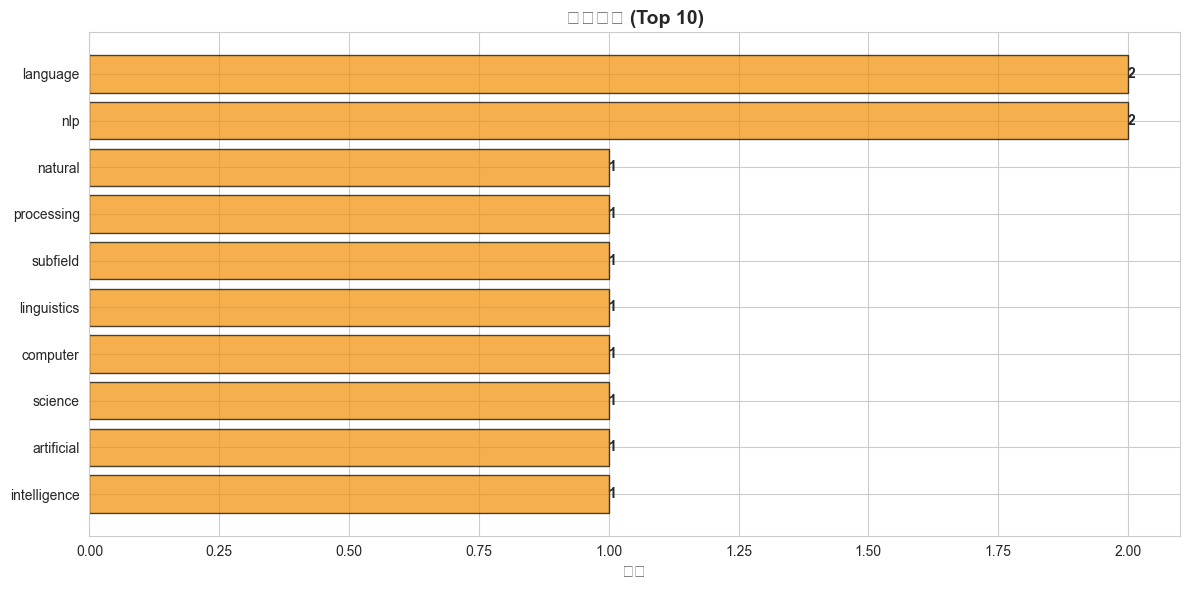


✅ Pipeline 處理完成!


In [25]:
# 實戰: 構建簡單 NLP Pipeline
import re
from collections import Counter

class SimpleNLPPipeline:
    """簡單的 NLP 處理流程"""
    
    def __init__(self):
        # 英文停用詞 (簡化版)
        self.stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'is', 'are', 'was', 'were', 
                          'to', 'of', 'in', 'on', 'at', 'for', 'with', 'from'}
    
    def clean_text(self, text):
        """步驟 1: 文本清洗"""
        # 轉小寫
        text = text.lower()
        # 移除標點符號
        text = re.sub(r'[^\w\s]', '', text)
        # 移除多餘空白
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def tokenize(self, text):
        """步驟 2: 分詞"""
        return text.split()
    
    def remove_stopwords(self, tokens):
        """步驟 3: 移除停用詞"""
        return [token for token in tokens if token not in self.stop_words]
    
    def extract_features(self, tokens):
        """步驟 4: 特徵提取 (詞頻統計)"""
        return Counter(tokens)
    
    def process(self, text):
        """完整處理流程"""
        print(f"原始文本:\n  {text}\n")
        
        # 步驟 1: 清洗
        cleaned = self.clean_text(text)
        print(f"1. 清洗後:\n  {cleaned}\n")
        
        # 步驟 2: 分詞
        tokens = self.tokenize(cleaned)
        print(f"2. 分詞 ({len(tokens)} 個詞):\n  {tokens}\n")
        
        # 步驟 3: 移除停用詞
        filtered_tokens = self.remove_stopwords(tokens)
        print(f"3. 移除停用詞 ({len(filtered_tokens)} 個詞):")
        print(f"  {filtered_tokens}\n")
        
        # 步驟 4: 特徵提取
        features = self.extract_features(filtered_tokens)
        print(f"4. 詞頻統計 (Top 5):")
        for word, count in features.most_common(5):
            print(f"  {word:15s}: {count}")
        
        return filtered_tokens, features

# 測試 Pipeline
print("=" * 60)
print("NLP Pipeline 實戰")
print("=" * 60 + "\n")

pipeline = SimpleNLPPipeline()

sample_text = """
Natural language processing (NLP) is a subfield of linguistics, 
computer science, and artificial intelligence. NLP is concerned 
with the interactions between computers and human language.
"""

tokens, features = pipeline.process(sample_text)

# 視覺化詞頻
top_words = dict(features.most_common(10))

fig, ax = plt.subplots(figsize=(12, 6))
words = list(top_words.keys())
counts = list(top_words.values())
bars = ax.barh(words, counts, color='#F18F01', alpha=0.7, edgecolor='black')
ax.set_xlabel('詞頻', fontsize=12)
ax.set_title('詞頻分佈 (Top 10)', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# 在柱狀圖上標註數值
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}',
            ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Pipeline 處理完成!")

### 練習 1: 擴展 Pipeline

嘗試以下擴展:
1. 加入中文處理 (使用 jieba 分詞)
2. 加入詞性標註
3. 計算 TF-IDF 特徵
4. 視覺化詞雲

---

<a id="7"></a>
## 7. 視覺化: NLP 技術棧層級圖

### 7.1 NLP 完整技術棧

從底層到應用層的完整架構:

```
┌─────────────────────────────────────┐
│      應用層 (Application Layer)      │
│  搜尋引擎、對話系統、機器翻譯        │
└─────────────────────────────────────┘
              ↑
┌─────────────────────────────────────┐
│      任務層 (Task Layer)             │
│  分類、NER、QA、摘要、生成           │
└─────────────────────────────────────┘
              ↑
┌─────────────────────────────────────┐
│      模型層 (Model Layer)            │
│  BERT、GPT、T5、RoBERTa              │
└─────────────────────────────────────┘
              ↑
┌─────────────────────────────────────┐
│      特徵層 (Feature Layer)          │
│  詞向量、TF-IDF、N-gram              │
└─────────────────────────────────────┘
              ↑
┌─────────────────────────────────────┐
│      預處理層 (Preprocessing Layer)  │
│  分詞、清洗、標準化                  │
└─────────────────────────────────────┘
              ↑
        原始文本 (Raw Text)
```

---

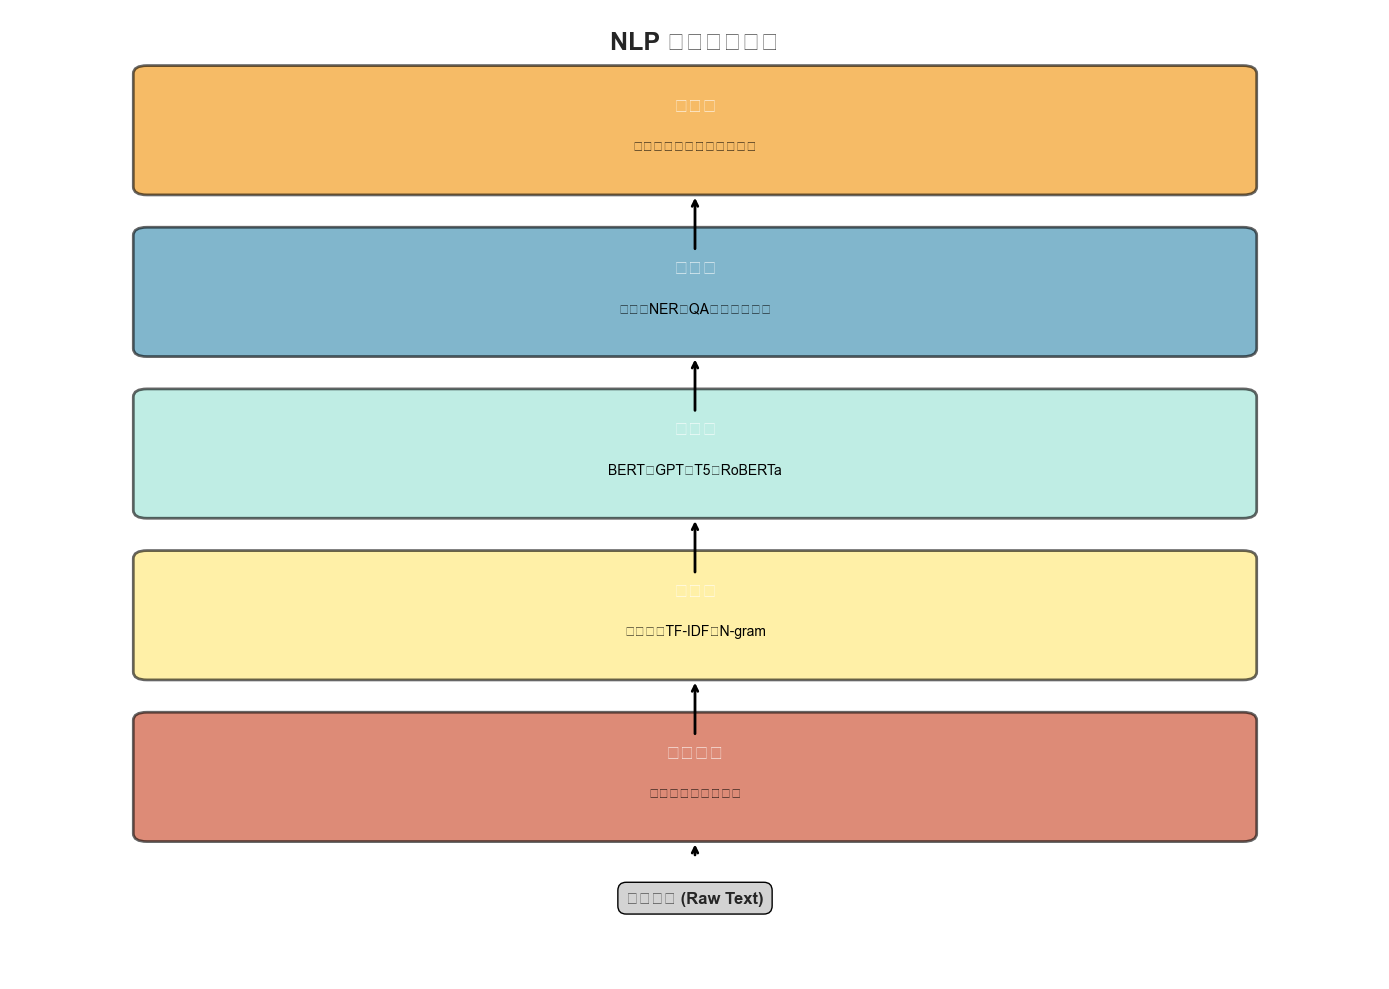


💡 技術棧解讀:
  預處理層: 文本清洗與標準化 (分詞、去噪)
  特徵層: 將文本轉換為數值表示 (詞向量、TF-IDF)
  模型層: 深度學習模型 (BERT、GPT 等)
  任務層: 具體 NLP 任務 (分類、NER、QA)
  應用層: 實際產品應用 (搜尋、對話、翻譯)


In [26]:
# NLP 技術棧視覺化
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 12)
ax.axis('off')

# 技術棧層級
layers = [
    (10.5, '應用層', '搜尋引擎、對話系統、翻譯', '#F18F01'),
    (8.5, '任務層', '分類、NER、QA、摘要、生成', '#2E86AB'),
    (6.5, '模型層', 'BERT、GPT、T5、RoBERTa', '#95E1D3'),
    (4.5, '特徵層', '詞向量、TF-IDF、N-gram', '#FFE66D'),
    (2.5, '預處理層', '分詞、清洗、標準化', '#C73E1D')
]

for y, title, content, color in layers:
    # 繪製方框
    rect = mpatches.FancyBboxPatch((1, y-0.7), 8, 1.4,
                                    boxstyle="round,pad=0.1",
                                    linewidth=2, edgecolor='black',
                                    facecolor=color, alpha=0.6)
    ax.add_patch(rect)
    
    # 標題
    ax.text(5, y+0.3, title, ha='center', va='center', 
            fontsize=14, fontweight='bold', color='white')
    
    # 內容
    ax.text(5, y-0.2, content, ha='center', va='center', 
            fontsize=10, color='black')
    
    # 連接箭頭 (除了最上層)
    if y > 2.5:
        ax.annotate('', xy=(5, y-0.8), xytext=(5, y-1.5),
                   arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# 原始文本
ax.text(5, 1, '原始文本 (Raw Text)', ha='center', va='center',
        fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', edgecolor='black'))

# 箭頭指向原始文本
ax.annotate('', xy=(5, 1.7), xytext=(5, 1.5),
           arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# 標題
ax.text(5, 11.5, 'NLP 技術棧層級圖', ha='center', 
        fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 技術棧解讀:")
print("  預處理層: 文本清洗與標準化 (分詞、去噪)")
print("  特徵層: 將文本轉換為數值表示 (詞向量、TF-IDF)")
print("  模型層: 深度學習模型 (BERT、GPT 等)")
print("  任務層: 具體 NLP 任務 (分類、NER、QA)")
print("  應用層: 實際產品應用 (搜尋、對話、翻譯)")

<a id="8"></a>
## 8. 本課總結與延伸閱讀

### 8.1 核心要點回顧

1. **NLP 的定義**:
   - 讓電腦理解、解釋與生成人類語言
   - 核心目標: 理解 (Understanding)、生成 (Generation)、轉換 (Transformation)

2. **語言的三大挑戰**:
   - 歧義性 (Ambiguity): 詞彙、句法、語義三層歧義
   - 離散性 (Discreteness): 詞向量解決相似度計算問題
   - 上下文依賴 (Context Dependency): BERT 等模型提供動態表示

3. **NLP 六大應用**:
   - 資訊檢索、機器翻譯、對話系統、文本分類、資訊抽取、文本生成

4. **NLP vs NLU vs NLG**:
   - NLP 是總稱,包含 NLU (理解) 和 NLG (生成)

5. **詞向量化**:
   - 從 One-Hot (稀疏) 到詞向量 (稠密)
   - 捕捉語義相似度,支援向量運算

6. **NLP Pipeline**:
   - 清洗 → 分詞 → 去停用詞 → 特徵提取 → 模型訓練

---

### 8.2 下節預告

**CH02-02: NLP 演變歷程**

我們將深入探討:
- NLP 的五大技術典範轉移
- 從規則系統到大型語言模型的演進
- 每個時代的核心技術與代表模型
- 計算能力/數據/演算法三維驅動框架
- 模型規模的指數級增長

---

### 8.3 延伸閱讀

#### 經典論文:
1. **Word2Vec**: Mikolov et al. (2013). *Efficient Estimation of Word Representations in Vector Space*.
2. **BERT**: Devlin et al. (2018). *BERT: Pre-training of Deep Bidirectional Transformers*.
3. **Transformer**: Vaswani et al. (2017). *Attention is All You Need*.

#### 推薦書籍:
- **Speech and Language Processing**: Daniel Jurafsky & James H. Martin
- **自然語言處理綜論**: 宗成慶
- **Deep Learning for NLP**: Yoav Goldberg

#### 線上資源:
- [Stanford CS224N](http://web.stanford.edu/class/cs224n/): NLP with Deep Learning
- [Hugging Face NLP Course](https://huggingface.co/course/)
- [NLP Progress](http://nlpprogress.com/): SOTA 模型追蹤

---

### 🙋 問題討論

有任何問題嗎?歡迎在討論區提問!

---

**課程資訊:**
- **作者:** iSpan NLP Team
- **版本:** v1.0
- **最後更新:** 2025-10-17
- **授權:** MIT License (僅供教學使用)